In [6]:
from keras.datasets import mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()

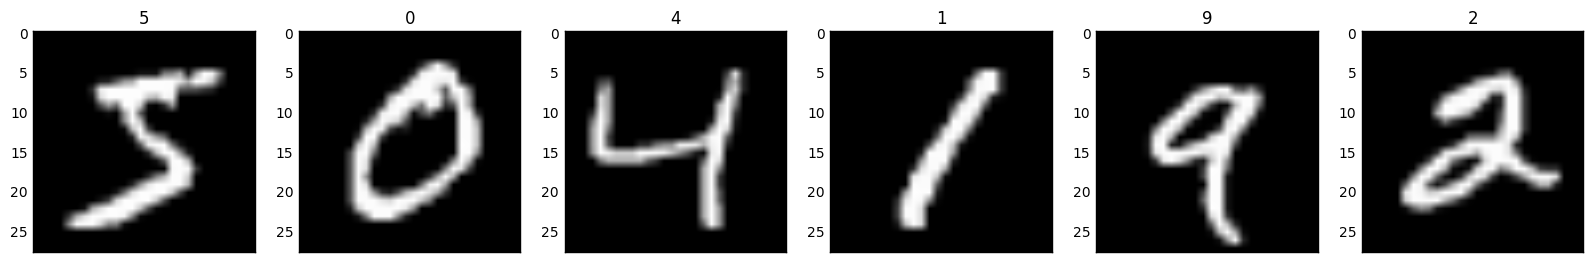

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm
import numpy as np
#查看前6张图
fig=plt.figure(figsize=(20,20))
for i in range(6):
    ax=fig.add_subplot(1,6,i+1,xticks=[])
    ax.imshow(x_train[i],cmap='gray')
    ax.set_title(str(y_train[i]))

In [11]:
#调整范围
x_train=x_train.astype('float32')/255
x_test=x_test.astype('float32')/255

In [13]:
#one-hot 编码
from keras.utils import np_utils
print(y_train[:10])
y_train=np_utils.to_categorical(y_train,10)
y_test=np_utils.to_categorical(y_test,10)
print(y_train[:10])

[5 0 4 1 9 2 1 3 1 4]
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [14]:
#MLP接受向量 矩阵转向量
#模型定义
from keras.models import Sequential
from keras.layers import Dense,Flatten,Dropout
model=Sequential()
model.add(Flatten(input_shape=x_train.shape[1:]))#展平层  图片的矩阵输入并将其转换为向量
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [18]:
x_train.shape

(60000, 28, 28)

In [20]:
a = [[1,3],[2,4],[3,5]]
a = np.array(a)
a.flatten()

array([1, 3, 2, 4, 3, 5])

In [21]:
#设置损失函数和优化程序
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [23]:
score=model.evaluate(x_test,y_test,verbose=0)
accuracy=100*score[1]
accuracy

12.27

In [24]:
from keras.callbacks import ModelCheckpoint#在每个epoch之后保存权重

In [28]:
checkpointer = ModelCheckpoint(filepath='mnist.model.best.hdf5',verbose=1,save_best_only=True)
#filepath 文件保存位置 verbose=1 文本输出 权重文件何时更新
hist=model.fit(x_train,y_train,batch_size=128,epochs=10,validation_split=0.2,callbacks=[checkpointer],verbose=1,shuffle=True)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 9s 185us/step - loss: 0.6925 - acc: 0.7937 - val_loss: 0.3662 - val_acc: 0.8924

Epoch 00001: val_loss improved from inf to 0.36617, saving model to mnist.model.best.hdf5
Epoch 2/10
48000/48000 [==============================] - 9s 184us/step - loss: 0.3543 - acc: 0.8968 - val_loss: 0.2957 - val_acc: 0.9156

Epoch 00002: val_loss improved from 0.36617 to 0.29571, saving model to mnist.model.best.hdf5
Epoch 3/10
48000/48000 [==============================] - 10s 206us/step - loss: 0.3175 - acc: 0.9092 - val_loss: 0.2810 - val_acc: 0.9186

Epoch 00003: val_loss improved from 0.29571 to 0.28102, saving model to mnist.model.best.hdf5
Epoch 4/10
48000/48000 [==============================] - 11s 225us/step - loss: 0.3028 - acc: 0.9137 - val_loss: 0.2893 - val_acc: 0.9167

Epoch 00004: val_loss did not improve from 0.28102
Epoch 5/10
48000/48000 [==============================] - 11s 2

In [29]:
score=model.evaluate(x_test,y_test,verbose=0)
score

[0.297226390632987, 0.9201]